# Part 1: Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [46]:
# Create a synthetic dataset. Optional, save it to disk
X, y = datasets.make_classification(n_samples=5000, n_features=30, n_informative=4, n_classes=3)
#np.savez("kNN_data.npz", X=X, y=y)

In [47]:
# Load data from disc (in case it was saved)
#loaded_data = np.load("kNN_data.npz")
#print(loaded_data.files)

#X = loaded_data['X']
#y = loaded_data['y']

In [48]:
# Extract input and output data
print(X.shape)
print(y.shape)

(5000, 30)
(5000,)


Unique labels: [0 1 2]


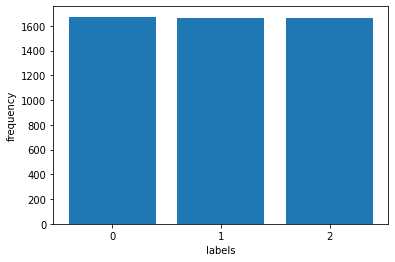

In [49]:
# Look the distribution of labels
print("Unique labels:", np.unique(y))

plt.hist(y, bins=[0, 1, 2, 3], align='left', rwidth=0.8)
plt.xticks([0, 1, 2], labels=['0', '1', '2'])
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

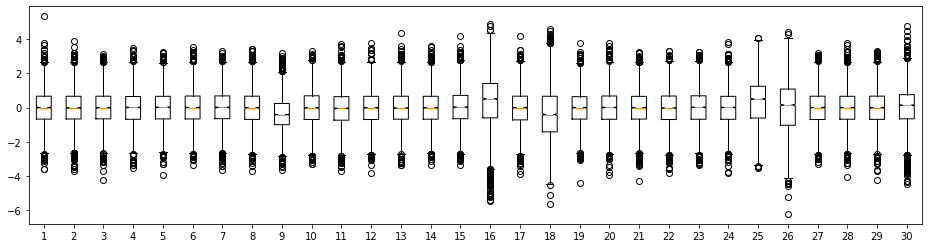

In [50]:
# Look at the distribution of the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X, notch=True)
plt.show()

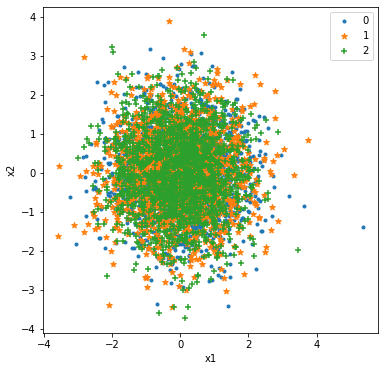

In [51]:
# Plot all points using only two of their features.
# Also plot two random queries
# You might try a differnt set of features
x1 = 0
x2 = 1

plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, x1], X[y==0, x2], marker='.', label='0')
plt.scatter(X[y==1, x1], X[y==1, x2], marker='*', label='1')
plt.scatter(X[y==2, x1], X[y==2, x2], marker='+', label='2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [52]:
# Split data into training, validation, and test sets
# Use only 10 features for now
x_train, x_test, y_train, y_test = train_test_split(X[:, :10], y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4050, 10)
(450, 10)
(500, 10)
(4050,)
(450,)
(500,)


# Part 2: kNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# Create a kNN classifier and train it on the training set.
# Use 3 nearest neighbors for now
kNN_classifier = KNeighborsClassifier(n_neighbors=3) # create model
kNN_classifier.fit(x_train, y_train)                 # train model

KNeighborsClassifier(n_neighbors=3)

In [55]:
# Print the labels that are know by the trained classifier
print(kNN_classifier.classes_)

[0 1 2]


In [56]:
# Evaluate on the training set first
print(f"Classification score on the training set: {kNN_classifier.score(x_train, y_train):.3f} \n")

Classification score on the training set: 0.649 



In [57]:
# Predict on the validation set first
y_val_hat = kNN_classifier.predict(x_val)

print(f"Classification score on the validation set: {kNN_classifier.score(x_val, y_val):.3f} \n")
# Show the first 20 labels
print(y_val[:20])
print(y_val_hat[:20])

Classification score on the validation set: 0.362 

[2 0 1 0 2 1 1 2 0 0 2 2 1 2 1 2 2 0 2 1]
[2 0 0 0 0 1 1 0 1 2 1 2 1 0 0 0 2 0 1 0]


In [58]:
# Predict on the test set now
y_test_hat = kNN_classifier.predict(x_test)

print(f"Classification score on the test set: {kNN_classifier.score(x_test, y_test):.3f} \n")
print(y_test[:20])
print(y_test_hat[:20])

Classification score on the test set: 0.374 

[1 1 2 0 1 0 2 1 1 1 2 1 0 0 2 1 0 2 0 1]
[1 2 0 0 2 0 2 2 0 0 1 1 0 2 1 0 0 0 0 2]


# Part 3: Experiment with different values of k

In [59]:
for k in [1, 3, 5, 10, 20, 30, 50, 100]:
  print(f"k = {k:3d}")
  # Create model and train it
  kNN_classifier = KNeighborsClassifier(n_neighbors=k)
  kNN_classifier.fit(x_train, y_train)
  # Evaluate and print info
  print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.3f}")
  print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.3f}")

k =   1
  performance on the training set: 1.000
  performance score on the validation set: 0.369
k =   3
  performance on the training set: 0.649
  performance score on the validation set: 0.362
k =   5
  performance on the training set: 0.589
  performance score on the validation set: 0.373
k =  10
  performance on the training set: 0.520
  performance score on the validation set: 0.387
k =  20
  performance on the training set: 0.488
  performance score on the validation set: 0.376
k =  30
  performance on the training set: 0.476
  performance score on the validation set: 0.389
k =  50
  performance on the training set: 0.462
  performance score on the validation set: 0.420
k = 100
  performance on the training set: 0.440
  performance score on the validation set: 0.380


In [60]:
# Explore k=1, ..., 100
max_k = 100

perf_train = np.zeros(max_k)
perf_val = np.zeros(max_k)

for k in range(1, max_k+1):
  # Create model and train it
  kNN_classifier = KNeighborsClassifier(n_neighbors=k)
  kNN_classifier.fit(x_train, y_train)
  # Evaluate and print info
  perf_train[k-1] = kNN_classifier.score(x_train, y_train)
  perf_val[k-1] = kNN_classifier.score(x_val, y_val)

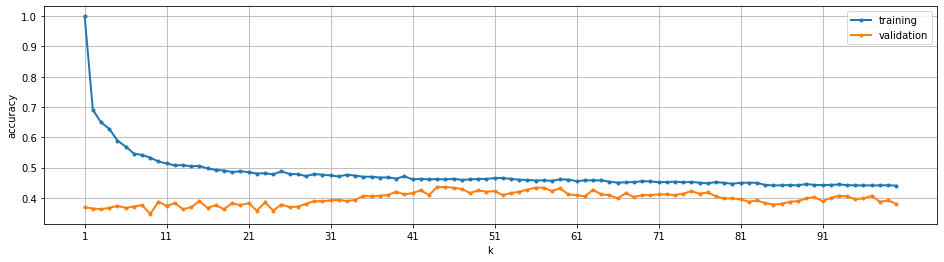

In [61]:
# Plot loss
plt.figure(figsize=(16, 4))
plt.plot(range(1, max_k+1), perf_train, label='training', marker='.', linewidth=2)
plt.plot(range(1, max_k+1), perf_val,   label='validation', marker='.', linewidth=2)
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(ticks=range(1, max_k+1, 10), labels=range(1, max_k+1, 10))
plt.grid(True)
plt.show()

# using grid search

In [62]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Define search parameters
grid_params = {'n_neighbors': np.arange(1, 51), 'metric': ['euclidean', 'manhattan']}

In [29]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params)

In [30]:
gs_results = gs.fit(x_train, y_train)

In [31]:
print(f"Best score: {gs_results.best_score_:.3f}")
print(f"Best params: {gs_results.best_params_}")

Best score: 0.607
Best params: {'metric': 'manhattan', 'n_neighbors': 42}


# Part 4: Experiment with more features

In [32]:
# Define the number of features
n_features = [5, 10, 15, 20, 25, 30]

In [35]:
for nf in n_features:
  # Split data (the wrong way)
  x_train, x_test, y_train, y_test = train_test_split(X[:, :nf], y, test_size=0.1)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

  # Create model and train it
  kNN_classifier = KNeighborsClassifier(n_neighbors=1)
  kNN_classifier.fit(x_train, y_train)
  
  # Evaluate and print info
  print(f"Number of features: {nf}")
  print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.3f}")
  print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.3f}")

Number of features: 5
  performance on the training set: 1.000
  performance score on the validation set: 0.353
Number of features: 10
  performance on the training set: 1.000
  performance score on the validation set: 0.531
Number of features: 15
  performance on the training set: 1.000
  performance score on the validation set: 0.684
Number of features: 20
  performance on the training set: 1.000
  performance score on the validation set: 0.678
Number of features: 25
  performance on the training set: 1.000
  performance score on the validation set: 0.662
Number of features: 30
  performance on the training set: 1.000
  performance score on the validation set: 0.618


In [36]:
# Repeat training with the best model
nf = 15
x_train, x_test, y_train, y_test = train_test_split(X[:, :nf], y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

# Train model
kNN_classifier = KNeighborsClassifier(n_neighbors=1)
kNN_classifier.fit(x_train, y_train)
  
# Evaluate and print info
print(f"Number of features: {nf}")
print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.3f}")
print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.3f}")
print(f"  performance score on the test set: {kNN_classifier.score(x_test, y_test):.3f}")

Number of features: 15
  performance on the training set: 1.000
  performance score on the validation set: 0.696
  performance score on the test set: 0.736


# Feature engineering

In [37]:
# Can we find a linear or non-linear combination of variables that could improve
# the classification performance?
# What features are good candidates to be combined?